<a href="https://colab.research.google.com/github/tjloader/states-drug-poison/blob/main/DrugPoisonings98_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drug Poisoning Data 1999-2018
##Taygun Loader
##9/2/2025

> Add blockquote



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/P2/Prototyping/Drug Poisoning Mortality project/Data/NCHS_-_Drug_Poisoning_Mortality_by_State__United_States.csv'
df = pd.read_csv(file_path)

display(df.head())

,State,Year,Sex,Age Group,Race and Hispanic Origin,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate,Unit
0,United States,2003,Both Sexes,15–24,Hispanic,226,7255772,3.1148,0.20719,2.7087,3.5209,NaN,NaN,NaN,NaN,NaN,8.8881,8.8765,"per 100,000 population"
1,Alabama,1999,Both Sexes,All Ages,All Races-All Origins,169,4430143,3.8148,0.29344,3.2396,4.3899,3.8521,0.29657,3.2708,4.4334,1.8–7.5,6.0382,6.0570,"per 100,000 population"
2,Alabama,2000,Both Sexes,All Ages,All Races-All Origins,197,4447100,4.4299,0.31561,3.8112,5.0485,4.4857,0.31985,3.8588,5.1126,1.8–7.5,6.1882,6.1749,"per 100,000 population"
3,Alabama,2001,Both Sexes,All Ages,All Races-All Origins,216,4467634,4.8348,0.32896,4.1900,5.4795,4.8915,0.33329,4.2382,5.5447,1.8–7.5,6.8057,6.7922,"per 100,000 population"
4,Alabama,2002,Both Sexes,All Ages,All Races-All Origins,211,4480089,4.7097,0.32423,4.0742,5.3452,4.7619,0.32868,4.1177,5.4062,1.8–7.5,8.1766,8.1957,"per 100,000 population"


##Gradio app code

In [38]:
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure df and df_filtered are available from previous cells
# If not, you might need to re-load or re-filter the data here
# file_path = '/content/drive/MyDrive/P2/Prototyping/Drug Poisoning Mortality project/Data/NCHS_-_Drug_Poisoning_Mortality_by_State__United_States.csv'
# df = pd.read_csv(file_path)
# df_filtered = df[df['Age Group'] != 'All Ages']

def plot_deaths_by_age_group():
    # Group by Age Group and sum Deaths
    age_group_deaths = df_filtered.groupby('Age Group')['Deaths'].sum()
    # Define the desired order of age groups
    age_order = ['0–14', '15–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']
    # Reindex the series to the desired order
    age_group_deaths = age_group_deaths.reindex(age_order)

    # Create a histogram
    plt.figure(figsize=(10, 6))
    sns.barplot(x=age_group_deaths.index, y=age_group_deaths.values, palette='viridis', hue=age_group_deaths.index, legend=False)
    plt.title('Total Deaths by Age Group (Excluding All Ages)')
    plt.xlabel('Age Group')
    plt.ylabel('Total Deaths')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

def plot_yearly_deaths():
    # Group by Year and sum Deaths
    yearly_deaths = df.groupby('Year')['Deaths'].sum()

    # Create a line graph
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o')
    plt.title('Total Drug Poisoning Deaths per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Deaths')
    plt.grid(True)
    plt.xticks(yearly_deaths.index) # Set x-axis ticks to be the years
    return plt.gcf()

def plot_top_10_states_pie():
    # Filter out 'United States'
    df_states = df[df['State'] != 'United States'].copy()

    # Group by State and calculate total deaths and average population
    state_data = df_states.groupby('State').agg(
        Total_Deaths=('Deaths', 'sum'),
        Average_Population=('Population', 'mean'),
        Average_Crude_Death_Rate=('Crude Death Rate', 'mean')
    ).reset_index()

    # Sort by Average Crude Death Rate and get the top 10
    top_10_states = state_data.sort_values(by='Average_Crude_Death_Rate', ascending=False).head(10)

    plt.figure(figsize=(10, 10))
    plt.pie(top_10_states['Total_Deaths'], labels=top_10_states['State'], autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Total Deaths in Top 10 States (by Average Crude Death Rate)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    return plt.gcf()

def generate_all_plots():
  return plot_deaths_by_age_group(), plot_yearly_deaths(), plot_top_10_states_pie()

# Create the Gradio Blocks interface
with gr.Blocks() as demo:
    gr.Markdown("# Drug Poisoning Data 1999-2018")
    gr.Markdown("Visualizations of drug poisoning mortality data.")
    with gr.Row():
        plot1_output = gr.Plot()
        plot2_output = gr.Plot()
        plot3_output = gr.Plot()

    demo.load(
        generate_all_plots,
        inputs=None,
        outputs=[plot1_output, plot2_output, plot3_output]
    )

demo.launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

#Graphs

##Total Deaths By Age Group

"All ages" categorization was removed to visualize this set of data as it con

,Deaths
Age Group,
0–14,9080
15–24,262240
25–34,630244
35–44,760872
45–54,815532
55–64,415870
65–74,94902
75+,51720


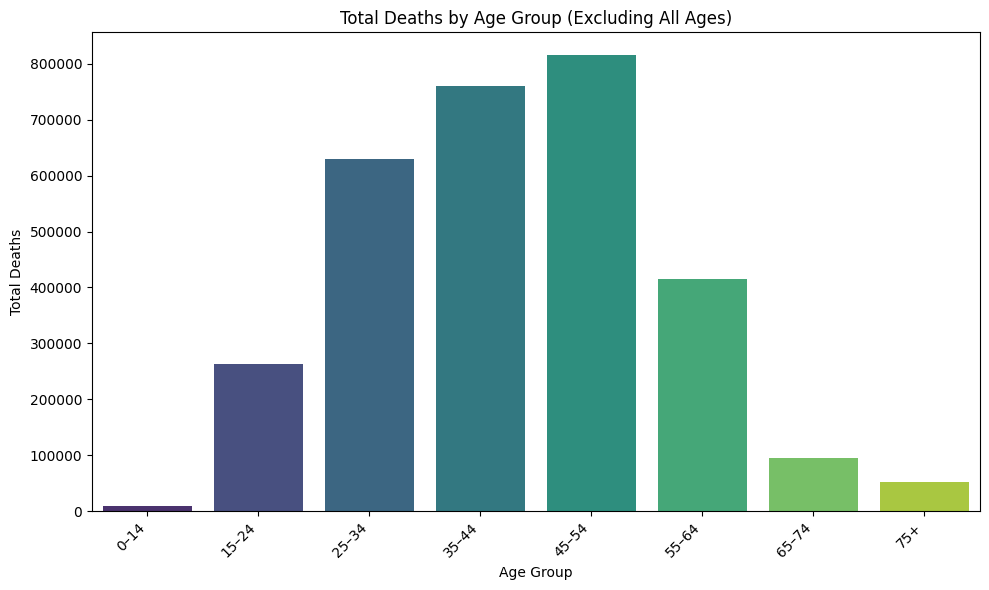

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out 'All Ages'
df_filtered = df[df['Age Group'] != 'All Ages']

# Group by Age Group and sum Deaths
age_group_deaths = df_filtered.groupby('Age Group')['Deaths'].sum()

# Define the desired order of age groups
age_order = ['0–14', '15–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']

# Reindex the series to the desired order
age_group_deaths = age_group_deaths.reindex(age_order)

display(age_group_deaths) # Display the data being plotted

# Create a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_deaths.index, y=age_group_deaths.values, palette='viridis', hue=age_group_deaths.index, legend=False)
plt.title('Total Deaths by Age Group (Excluding All Ages)')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
display(plt.gcf()) # Explicitly display the current figure

##Total Drug Poisonings Per Year

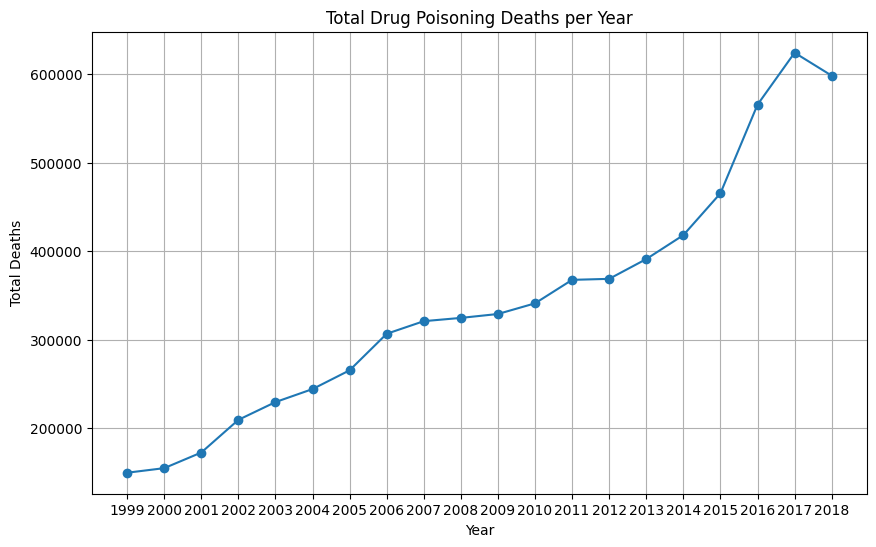

In [4]:
# Group by Year and sum Deaths
yearly_deaths = df.groupby('Year')['Deaths'].sum()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths.values, marker='o')
plt.title('Total Drug Poisoning Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.xticks(yearly_deaths.index) # Set x-axis ticks to be the years
plt.show()

##Total Deaths in the Top 10 States

In [5]:
# Filter out 'United States'
df_states = df[df['State'] != 'United States'].copy()

# Group by State and calculate total deaths and average population
state_data = df_states.groupby('State').agg(
    Total_Deaths=('Deaths', 'sum'),
    Average_Population=('Population', 'mean'),
    Average_Crude_Death_Rate=('Crude Death Rate', 'mean')
).reset_index()

# Sort by Average Crude Death Rate and get the top 10
top_10_states = state_data.sort_values(by='Average_Crude_Death_Rate', ascending=False).head(10)

# Display the table
display(top_10_states)

,State,Total_Deaths,Average_Population,Average_Crude_Death_Rate
48,West Virginia,9187,1829581.70,25.060675
31,New Mexico,8498,1988743.80,21.175320
17,Kentucky,16714,4271462.60,19.288255
28,Nevada,9918,2568488.95,18.876565
38,Pennsylvania,45282,12586662.85,17.872465
39,Rhode Island,3719,1057263.90,17.589350
8,District of Columbia,2186,610904.55,17.311545
35,Ohio,39734,11511335.75,17.176315
20,Maryland,19742,5710357.80,17.035740
44,Utah,9252,2668228.15,16.947515


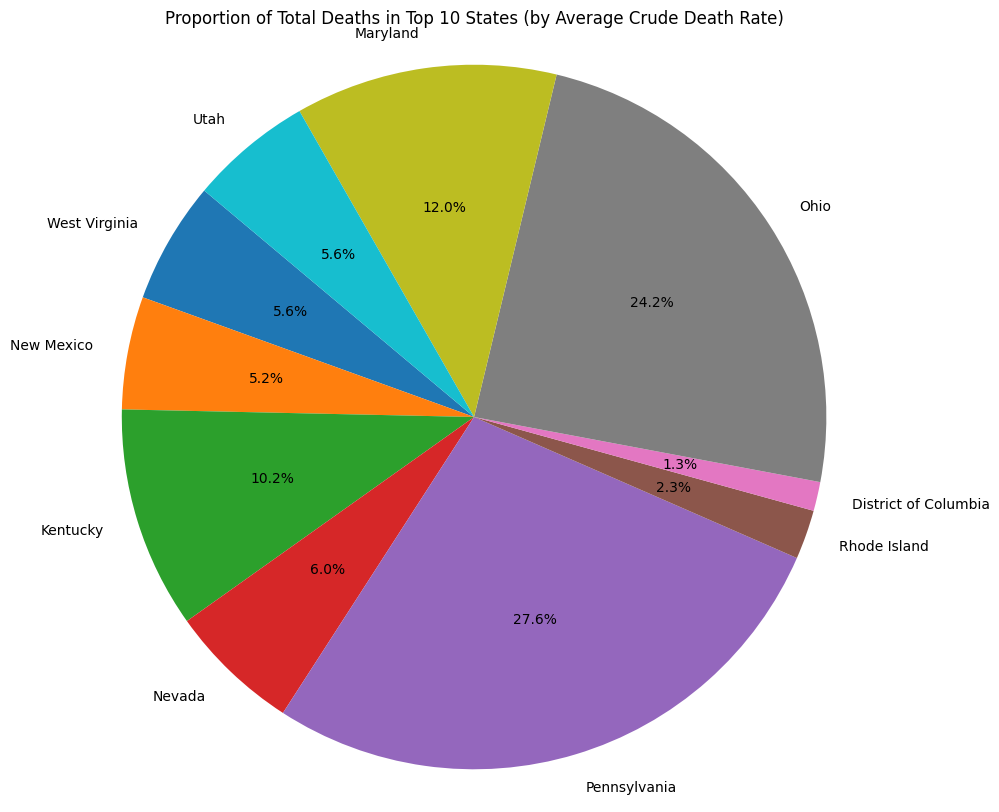

In [6]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_states['Total_Deaths'], labels=top_10_states['State'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Deaths in Top 10 States (by Average Crude Death Rate)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()